In [1]:
# importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

<h2>1. Read and preprecess data</h2>

In [2]:
# set NumPy options
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)

# read CSV data with Pandas
data = pd.read_csv("../data/iris.csv")
print("Original data: ")
print(data)

X = data.loc[:, :"PetalWidthCm"]
y = data.Species

Original data: 
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


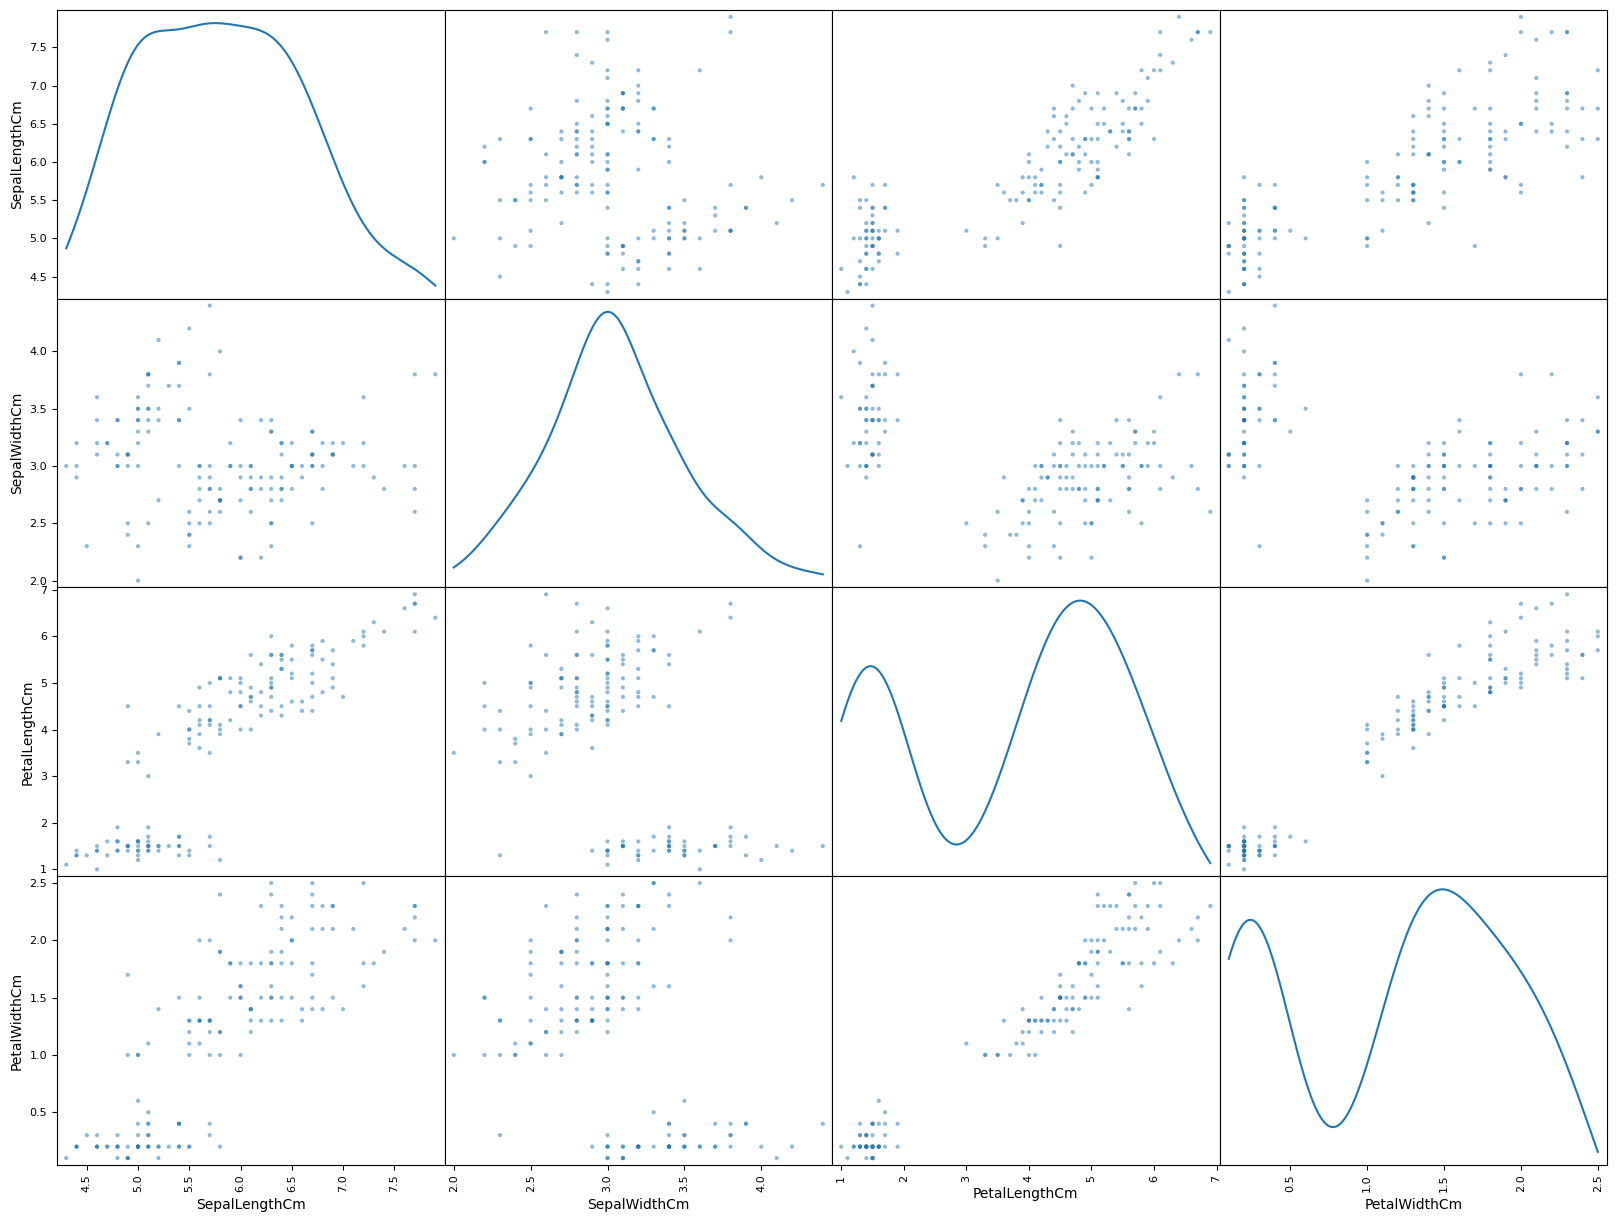

In [3]:
# pairwise relationships and distributions of variables in the dataset:
pd.plotting.scatter_matrix(X, diagonal="kde", figsize=(20, 15))
plt.show()

Text(0.5, 1.0, 'Iris flower dataset')

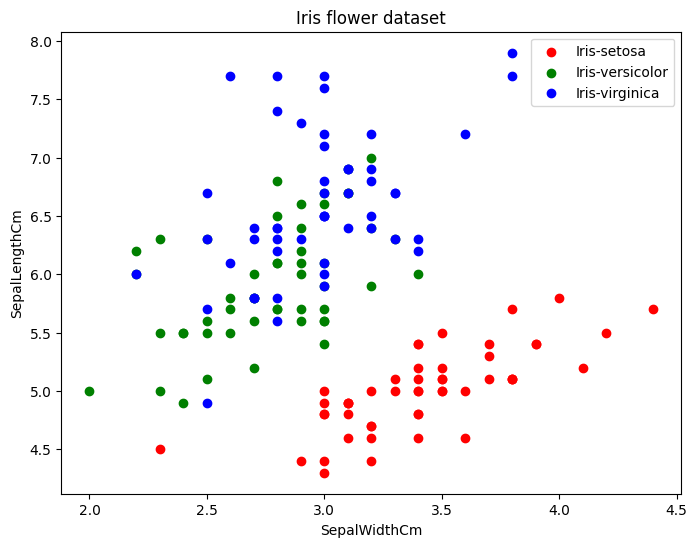

In [4]:
x_variable = "SepalWidthCm"
y_variable = "SepalLengthCm"
class_color_map = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# use scatter plot to visualize the initial data base on x and y variable
plt.figure(figsize=(8, 6))
for label, color in class_color_map.items():
    plt.scatter(data[data['Species'] == label][x_variable], 
                data[data['Species'] == label][y_variable], 
                c=color, label=label)
plt.legend()
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title("Iris flower dataset")

<h2>2. Some basic multivariate analysis with visualization</h2>

## Mean 
SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

## Standard deviation
SepalLengthCm    0.825301
SepalWidthCm     0.432147
PetalLengthCm    1.758529
PetalWidthCm     0.760613
dtype: float64
## Max: 
SepalLengthCm    7.9
SepalWidthCm     4.4
PetalLengthCm    6.9
PetalWidthCm     2.5
dtype: float64

## Min
SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
dtype: float64


<BarContainer object of 4 artists>

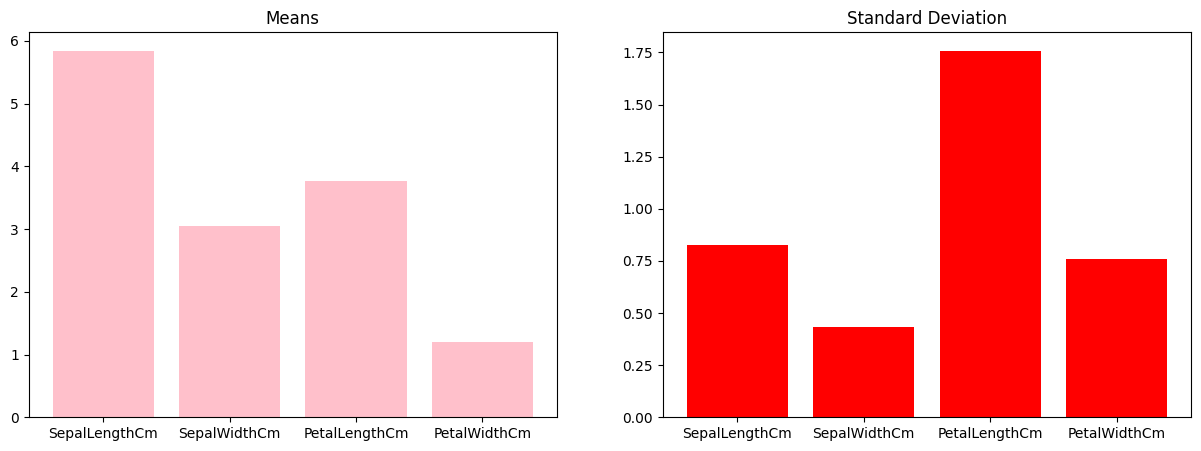

In [5]:
# calculate statistical quantities for dataset
mean = X.apply(np.mean)                     # compute mean value of each feature
standard_deviation = X.apply(np.std)        # compute standard deviation of each feature
max = X.apply(np.max)                       # compute max value in each feature
min = X.apply(np.min)                       # compute min value in each feature

print("## Mean ")
print(mean)
print()
print("## Standard deviation")
print(standard_deviation)
print("## Max: ")
print(max)
print()
print("## Min")
print(min)

# plot mean and std 
plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1, 2, 1)
plt.title("Means")
plt.bar(mean.index, mean.values, color = "pink")

plt.subplot(1, 2, 2)
plt.title("Standard Deviation")
plt.bar(standard_deviation.index, standard_deviation.values, color = 'red')

## Means:
Species
Iris-setosa        2.533
Iris-versicolor    3.573
Iris-virginica     4.285
dtype: float64

## Standard deviations:
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa           0.348947      0.377195       0.171767      0.106132
Iris-versicolor       0.510983      0.310644       0.465188      0.195765
Iris-virginica        0.629489      0.319255       0.546348      0.271890


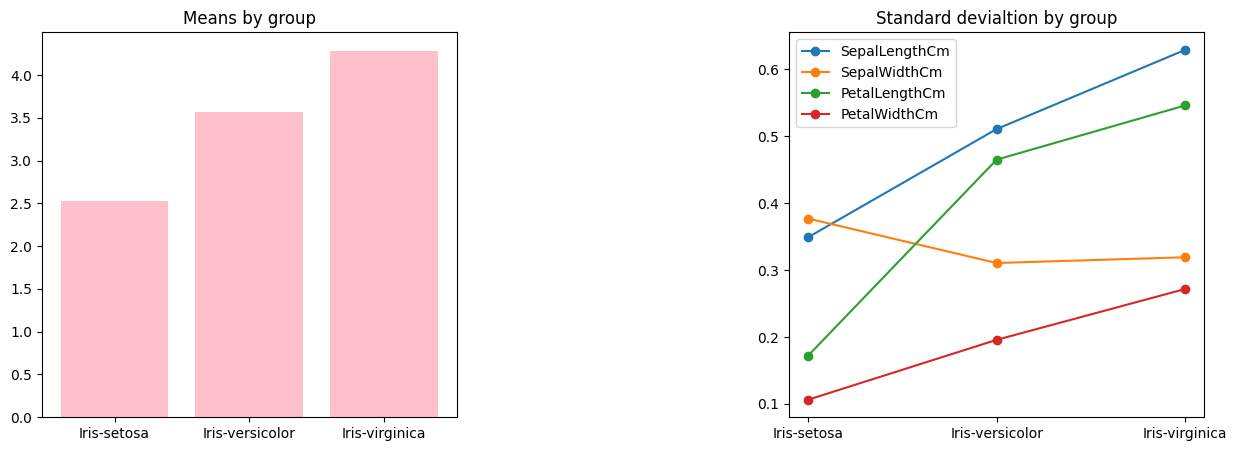

In [6]:
# mean and variance per group
def mean_and_sd_by_group(variables, group_variable):
    # group the data by class identifier
    data_group_by = variables.groupby(group_variable)

    # calculate the means
    print("## Means:")
    print(data_group_by.apply(np.mean))
    mean = data_group_by.apply(np.mean)

    # calculate the standard deviations : càng lớn thì mức độ biến động của dữ liệu càng cao
    print("\n## Standard deviations:")
    print(data_group_by.apply(np.std))
    std = data_group_by.apply(np.std)   

    return mean, std
    
gr_mean, gr_std = mean_and_sd_by_group(X, y)

# plot data by mean and std
plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.8)

plt.subplot(1, 2, 1)
plt.title("Means by group")
plt.bar(gr_mean.index, gr_mean.values, color = "pink")

plt.subplot(1, 2, 2)
plt.title("Standard devialtion by group")
plt.plot(gr_std,  "-o", label = gr_std.columns,)
plt.legend()

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


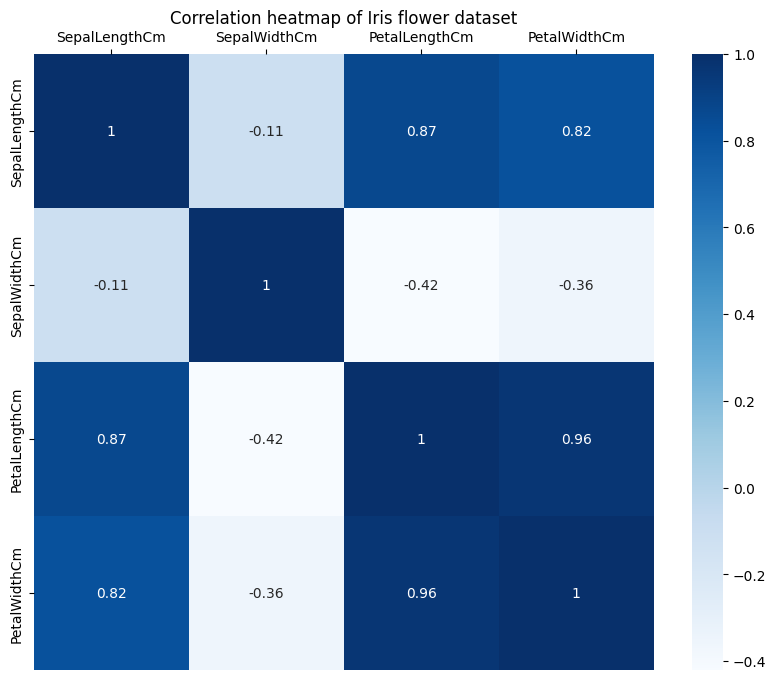

In [7]:
# correlation matrix
corr_mat = X.corr()
print(corr_mat)

# plot the matrix with heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(corr_mat, vmax=1., square=False, cmap= "Blues", annot=True).xaxis.tick_top()
plt.title("Correlation heatmap of Iris flower dataset", pad = 5)
plt.show()

<h2>3. PCA and LDA</h2>

In [8]:
# standardising variables
standardisedX = scale(X)
# Set to a new dataframe
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

print(standardisedX.apply(np.mean))     
print()
print(standardisedX.apply(np.std))

SepalLengthCm   -4.736952e-16
SepalWidthCm    -6.631732e-16
PetalLengthCm    3.315866e-16
PetalWidthCm    -2.842171e-16
dtype: float64

SepalLengthCm    1.0
SepalWidthCm     1.0
PetalLengthCm    1.0
PetalWidthCm     1.0
dtype: float64


<h3>a. PCA</h3>

In [9]:
# apply PCA using scikit-learn
pca = PCA().fit(standardisedX)

# check the summary of PCA results
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    
    # compute the standard deviation of each principal components 
    a = list(np.std(pca.transform(standardised_data), axis=0))
    
    # b contains proportion of variance of corresponding principal components
    b = list(pca.explained_variance_ratio_)
    
    # cumprop[i] = varprop[0] + varprop[1] + ... + varprop[i-1] + varprop[i]
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    
    # set to be an output table 
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("## Importance of components:")
        print(summary)
    return summary

summary = pca_summary(pca, standardisedX)
print()


## Importance of components:
                  sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           1.706112               0.727705              0.727705
PC2           0.959803               0.230305              0.958010
PC3           0.383866               0.036838              0.994848
PC4           0.143554               0.005152              1.000000



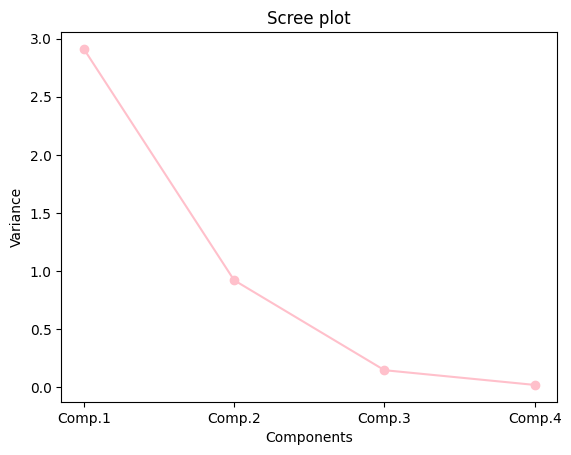

In [10]:
# check how many principle components to retain
def scree_plot(pca, standardised_values):

    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    
    plt.plot(x, y, "o-", color= 'pink')
    # set label for x and y axis
    plt.xticks(x, ["Comp."+str(i) for i in x])
    plt.ylabel("Variance")
    plt.xlabel("Components")
    plt.title("Scree plot")
    plt.show()

scree_plot(pca, standardisedX)

In [11]:
# calculate the value of the first principal component
print(pca.components_[0])
print(np.sum(pca.components_[0] ** 2))

def calc_pc(variables, loadings):
    
    # find the number of samples in the data set and the number of variables
    num_samples, num_variables = variables.shape
    
    # make a vector to store the component
    pc = np.zeros(num_samples)
    
    # calculate the value of the component for each sample
    for i in range(num_samples):
        value_i = 0
        for j in range(num_variables):
            value_ij = variables.iloc[i, j]
            loading_j = loadings[j]
            value_i = value_i + (value_ij * loading_j)
        pc[i] = value_i
    return pc

print(calc_pc(standardisedX, pca.components_[0]))       


[ 0.52237162 -0.26335492  0.58125401  0.56561105]
0.9999999999999996
[-2.26454173 -2.0864255  -2.36795045 -2.30419716 -2.38877749 -2.07053681
 -2.44571134 -2.23384186 -2.34195768 -2.18867576 -2.16348656 -2.32737775
 -2.22408272 -2.63971626 -2.19229151 -2.25146521 -2.20275048 -2.19017916
 -1.89407429 -2.33994907 -1.91455639 -2.2046454  -2.77416979 -1.82041156
 -2.2282175  -1.95702401 -2.05206331 -2.16819365 -2.14030596 -2.26879019
 -2.14455443 -1.8319381  -2.60820287 -2.43795086 -2.18867576 -2.2111199
 -2.04441652 -2.18867576 -2.4359522  -2.1705472  -2.28652724 -1.87170722
 -2.55783442 -1.96427929 -2.13337283 -2.07535759 -2.38125822 -2.39819169
 -2.22678121 -2.20595417  1.10399365  0.73248144  1.24210951  0.39730728
  1.07259395  0.38445815  0.74871508 -0.49786339  0.92622237  0.00496803
 -0.12469746  0.43873012  0.55163398  0.71716507 -0.03725838  0.87589054
  0.3480064   0.15339254  1.21530321  0.15694118  0.7382561   0.47236968
  1.22798821  0.62938105  0.7004728   0.87353699  1.2542

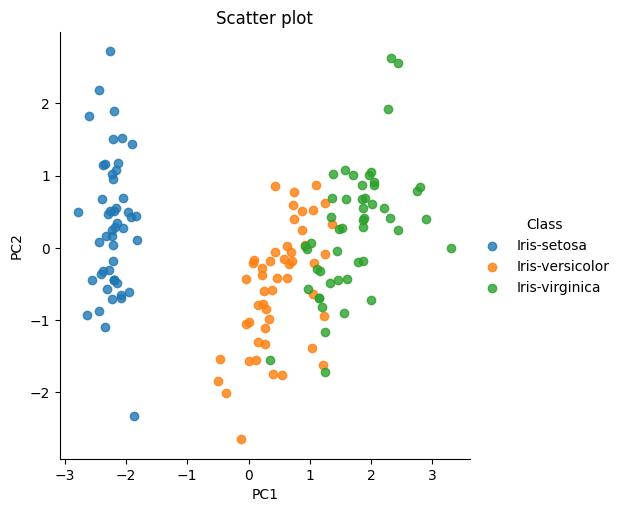

In [12]:
# visualize scatter plots of the principal components
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot(x="PC1", y="PC2", data=bar, hue="Class", fit_reg=False)
    plt.title("Scatter plot")


pca_scatter(pca, standardisedX, y)

<h2>b. LDA</h2>

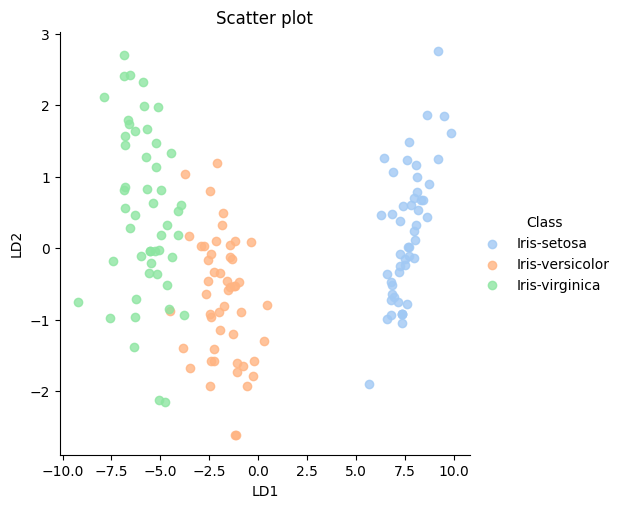

In [13]:
lda = LinearDiscriminantAnalysis().fit(standardisedX, y)

# visualize scatter plots of the linear discriminant
def lda_scatter(lda, standardised_values, classifs):
    foo = lda.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["LD1", "LD2", "Class"]) 
    sns.lmplot(x="LD1", y="LD2", data=bar, hue="Class", fit_reg=False, palette = "pastel")
    plt.title("Scatter plot")
    
lda_scatter(lda, standardisedX, y)

In [14]:
# print each linear discriminant of LDA
for i, component in enumerate(lda.scalings_.T):
    print(f"Linear Discriminant {i+1}: {component}")

Linear Discriminant 1: [ 0.67614337  0.66890811 -3.84228173 -2.17067434]
Linear Discriminant 2: [ 0.0271192   0.93115101 -1.63586613  2.13428251]


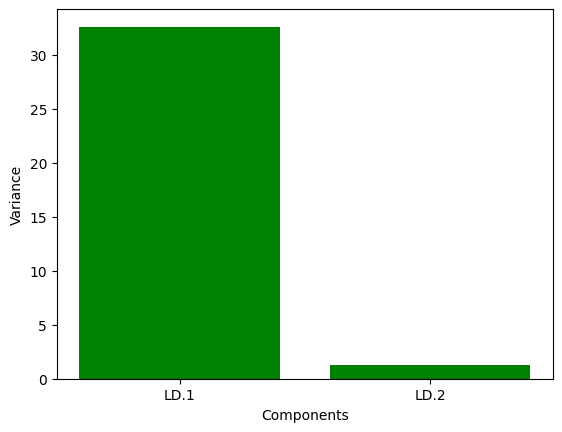

In [15]:
# plot the variance value of linear discriminant
def scree_plot(lda, standardised_values):
    # compute variance
    y = np.std(lda.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    
    plt.bar(x, y, color= 'green')
    # set label for x and y axis
    plt.xticks(x, ["LD."+str(i) for i in x])
    plt.ylabel("Variance")
    plt.xlabel("Components")
    plt.show()

scree_plot(lda, standardisedX)